<a href="https://colab.research.google.com/github/fdmy2713-dotcom/FDS/blob/main/Unit08_1_log_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. import library and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# ---------------------------
# 1. Load and Explore the Dataset
# ---------------------------
# Load the diamonds dataset from Seaborn
df = sns.load_dataset('diamonds')

# Since the dataset is already a pandas DataFrame, we can work directly with it.
# Display the first few rows of the dataset.
print("First five rows of the dataset:")
print(df.head())

# Print out the column names.
print("\nColumn names:")
print(df.columns.tolist())

First five rows of the dataset:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Column names:
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


## 2. Data visualization

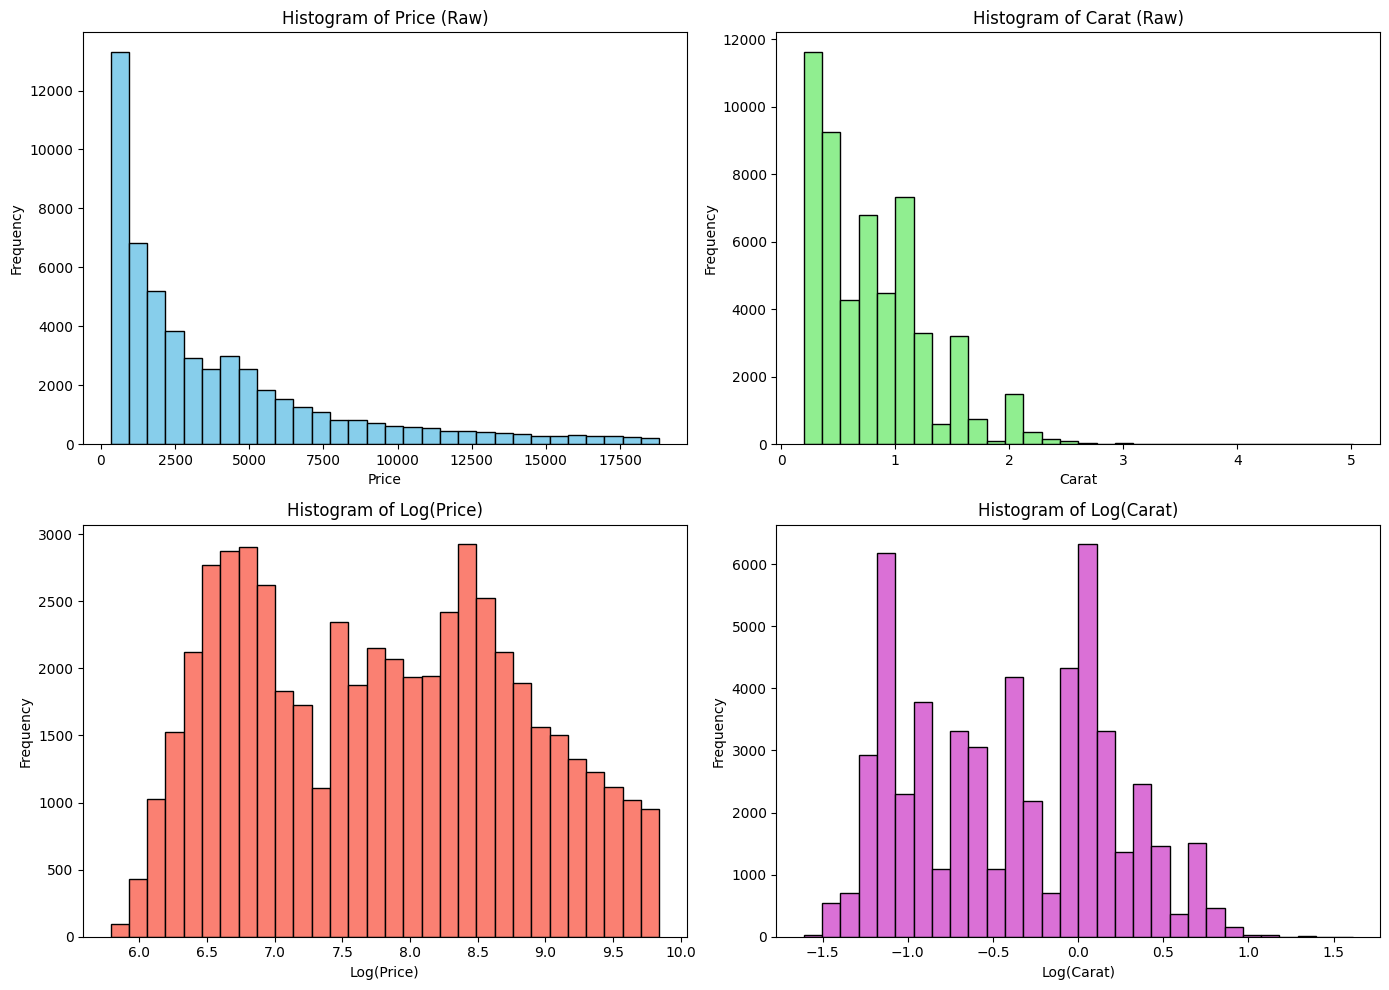

In [2]:
# ---------------------------
# 2. Visualize Distributions of Features
# ---------------------------
plt.figure(figsize=(14, 10))

# Histogram of raw 'price'
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price (Raw)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram of raw 'carat'
plt.subplot(2, 2, 2)
plt.hist(df['carat'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Carat (Raw)')
plt.xlabel('Carat')
plt.ylabel('Frequency')

# Histogram of log-transformed 'price'
plt.subplot(2, 2, 3)
plt.hist(np.log(df['price']), bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Histogram of log-transformed 'carat'
plt.subplot(2, 2, 4)
plt.hist(np.log(df['carat']), bins=30, color='orchid', edgecolor='black')
plt.title('Histogram of Log(Carat)')
plt.xlabel('Log(Carat)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

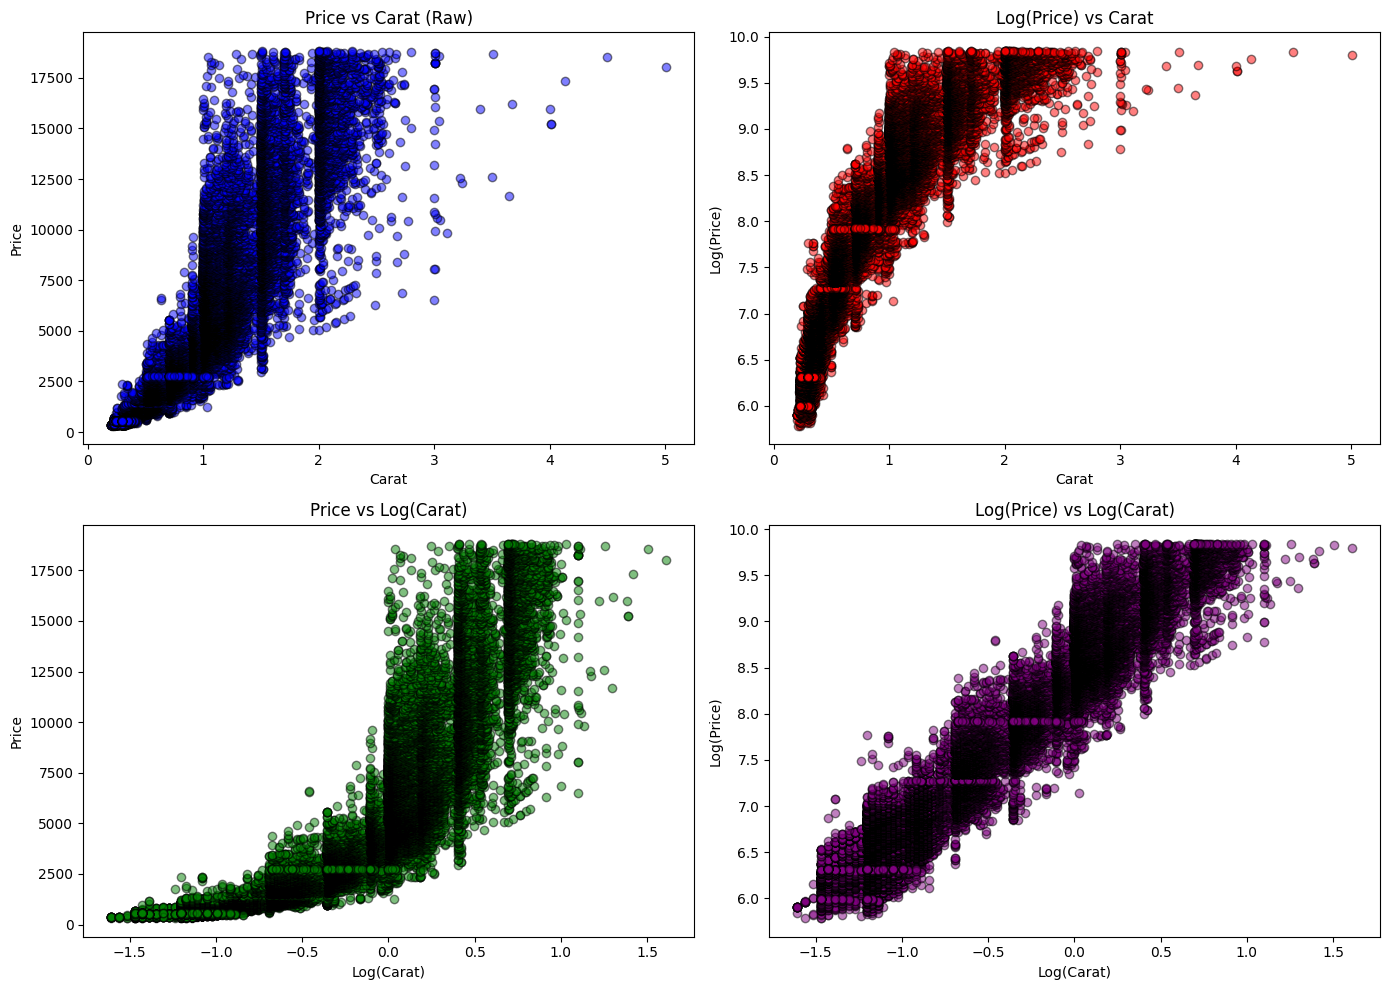

In [3]:
# ---------------------------
# 3. Visualize Relationships Between Features
# ---------------------------
plt.figure(figsize=(14, 10))

# Scatter plot: Raw Price vs Raw Carat
plt.subplot(2, 2, 1)
plt.scatter(df['carat'], df['price'], alpha=0.5, color='blue', edgecolor='k')
plt.title('Price vs Carat (Raw)')
plt.xlabel('Carat')
plt.ylabel('Price')

# Scatter plot: Log(Price) vs Raw Carat
plt.subplot(2, 2, 2)
plt.scatter(df['carat'], np.log(df['price']), alpha=0.5, color='red', edgecolor='k')
plt.title('Log(Price) vs Carat')
plt.xlabel('Carat')
plt.ylabel('Log(Price)')

# Scatter plot: Raw Price vs Log(Carat)
plt.subplot(2, 2, 3)
plt.scatter(np.log(df['carat']), df['price'], alpha=0.5, color='green', edgecolor='k')
plt.title('Price vs Log(Carat)')
plt.xlabel('Log(Carat)')
plt.ylabel('Price')

# Scatter plot: Log(Price) vs Log(Carat)
plt.subplot(2, 2, 4)
plt.scatter(np.log(df['carat']), np.log(df['price']), alpha=0.5, color='purple', edgecolor='k')
plt.title('Log(Price) vs Log(Carat)')
plt.xlabel('Log(Carat)')
plt.ylabel('Log(Price)')

plt.tight_layout()
plt.show()

Deciding on the Model:
- Use a log-lin model (log(price) ~ carat) if only the dependent variable ('price') is skewed and needs transformation.
- Use a lin-log model (price ~ log(carat)) if the independent variable ('carat') is skewed.
- Use a log-log model (log(price) ~ log(carat)) if both variables are skewed, or if you are interested in elasticity (i.e., percentage changes).

## 3. Modelling

In [4]:
# Normal Model: No transformation
model_normal = smf.ols("price ~ carat", data=df).fit()

# Log-Lin Model: log(price) ~ carat
model_loglin = smf.ols("np.log(price) ~ carat", data=df).fit()

# Lin-Log Model: price ~ log(carat)
model_linlog = smf.ols("price ~ np.log(carat)", data=df).fit()

# Log-Log Model: log(price) ~ log(carat)
model_loglog = smf.ols("np.log(price) ~ np.log(carat)", data=df).fit()


## 4. Summary

In [5]:
summary_data = {
    "Model Type": ["Normal", "Log-Lin", "Lin-Log", "Log-Log"],
    "Formula": ["price ~ carat", "log(price) ~ carat", "price ~ log(carat)", "log(price) ~ log(carat)"],
    "Intercept": [
        model_normal.params["Intercept"],
        model_loglin.params["Intercept"],
        model_linlog.params["Intercept"],
        model_loglog.params["Intercept"]
    ],
    "Slope": [
        model_normal.params["carat"],
        model_loglin.params["carat"],
        model_linlog.params["np.log(carat)"],
        model_loglog.params["np.log(carat)"]
    ],
    "R-squared": [
        model_normal.rsquared,
        model_loglin.rsquared,
        model_linlog.rsquared,
        model_loglog.rsquared
    ]
}

df_summary = pd.DataFrame(summary_data)
print("\nSummary of Models:")
print(df_summary)
print('****** Interpretation ********')
print(f"In the Normal model, a 1 unit increase in carat increases price by {model_normal.params['carat']:.2f} units on average.")
print('******')
print(f"In the Log-Lin model, a 1 unit increase in carat increases price by about {(np.exp(model_loglin.params['carat']) - 1)*100:.2f}%.")
print('******')
print(f"In the Lin-Log model, a 1% increase in carat changes price by approximately {model_linlog.params['np.log(carat)']/100:.4f} units (for small changes).")
print('******')
print(f"In the Log-Log model, a 1% increase in carat is associated with a {model_loglog.params['np.log(carat)']*100:.2f}% change in price.")


Summary of Models:
  Model Type                  Formula    Intercept        Slope  R-squared
0     Normal            price ~ carat -2256.360580  7756.425618   0.849331
1    Log-Lin       log(price) ~ carat     6.215021     1.969757   0.846780
2    Lin-Log       price ~ log(carat)  6237.836634  5836.024561   0.731924
3    Log-Log  log(price) ~ log(carat)     8.448661     1.675817   0.932989
****** Interpretation ********
In the Normal model, a 1 unit increase in carat increases price by 7756.43 units on average.
******
In the Log-Lin model, a 1 unit increase in carat increases price by about 616.89%.
******
In the Lin-Log model, a 1% increase in carat changes price by approximately 58.3602 units (for small changes).
******
In the Log-Log model, a 1% increase in carat is associated with a 167.58% change in price.


## Annex 1: Detailed Model Summary

In [6]:
# Model: price ~ carat
model_normal = smf.ols("price ~ carat", data=df).fit()
print("\n----- Normal Model Summary (price ~ carat) -----")
print(model_normal.summary())


----- Normal Model Summary (price ~ carat) -----
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:17:56   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [7]:
# ----- Model 2: Log-Lin Model -----
# Model: log(price) ~ carat
model_loglin = smf.ols("np.log(price) ~ carat", data=df).fit()
print("\n----- Log-Lin Model Summary (log(price) ~ carat) -----")
print(model_loglin.summary())


----- Log-Lin Model Summary (log(price) ~ carat) -----
                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.981e+05
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:18:00   Log-Likelihood:                -26729.
No. Observations:               53940   AIC:                         5.346e+04
Df Residuals:                   53938   BIC:                         5.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [8]:
# ----- Model 3: Lin-Log Model -----
# Model: price ~ log(carat)
model_linlog = smf.ols("price ~ np.log(carat)", data=df).fit()
print("\n----- Lin-Log Model Summary (price ~ log(carat)) -----")
print(model_linlog.summary())


----- Lin-Log Model Summary (price ~ log(carat)) -----
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                 1.473e+05
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:18:02   Log-Likelihood:            -4.8827e+05
No. Observations:               53940   AIC:                         9.765e+05
Df Residuals:                   53938   BIC:                         9.766e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [9]:
# ----- Model 4: Log-Log Model -----
# Model: log(price) ~ log(carat)
model_loglog = smf.ols("np.log(price) ~ np.log(carat)", data=df).fit()
print("\n----- Log-Log Model Summary (log(price) ~ log(carat)) -----")
print(model_loglog.summary())


----- Log-Log Model Summary (log(price) ~ log(carat)) -----
                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.510e+05
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:18:05   Log-Likelihood:                -4424.2
No. Observations:               53940   AIC:                             8852.
Df Residuals:                   53938   BIC:                             8870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

## Annex 2: Residual Plots

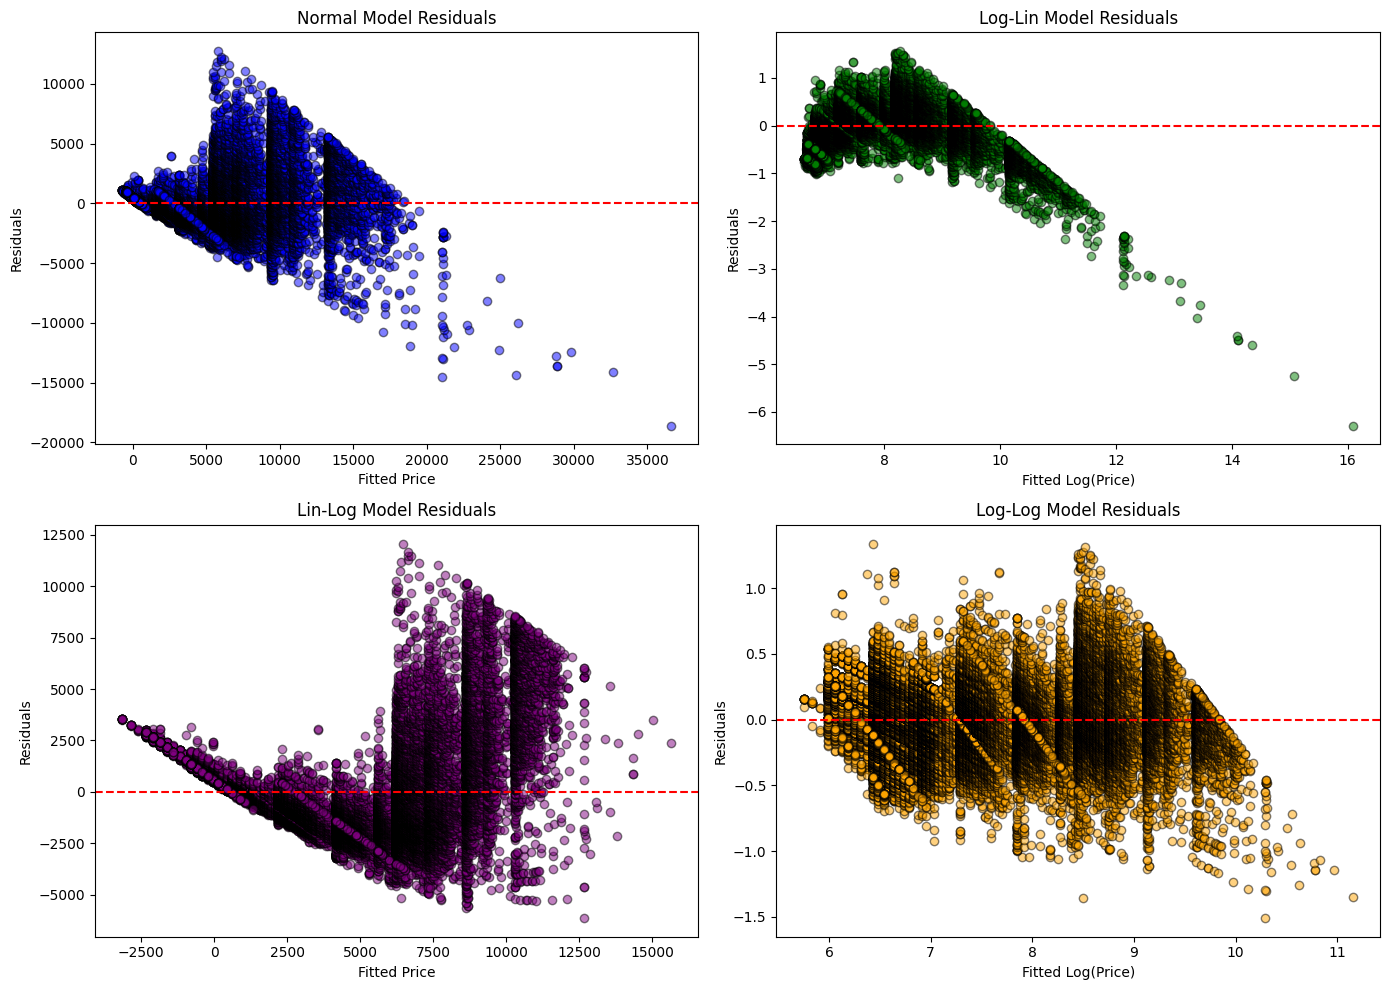

In [10]:
# Normal Model: residual = observed price - predicted price
pred_normal = model_normal.predict(df)
residuals_normal = df['price'] - pred_normal

# Log-Lin Model: residual = observed log(price) - predicted log(price)
pred_loglin = model_loglin.predict(df)
residuals_loglin = np.log(df['price']) - pred_loglin

# Lin-Log Model: residual = observed price - predicted price
pred_linlog = model_linlog.predict(df)
residuals_linlog = df['price'] - pred_linlog

# Log-Log Model: residual = observed log(price) - predicted log(price)
pred_loglog = model_loglog.predict(df)
residuals_loglog = np.log(df['price']) - pred_loglog

# ---------------------------
# 4. Plot Residual Plots for Each Model
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Normal Model Residual Plot
axs[0].scatter(pred_normal, residuals_normal, alpha=0.5, color='blue', edgecolor='k')
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("Normal Model Residuals")
axs[0].set_xlabel("Fitted Price")
axs[0].set_ylabel("Residuals")

# Log-Lin Model Residual Plot
axs[1].scatter(pred_loglin, residuals_loglin, alpha=0.5, color='green', edgecolor='k')
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title("Log-Lin Model Residuals")
axs[1].set_xlabel("Fitted Log(Price)")
axs[1].set_ylabel("Residuals")

# Lin-Log Model Residual Plot
axs[2].scatter(pred_linlog, residuals_linlog, alpha=0.5, color='purple', edgecolor='k')
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title("Lin-Log Model Residuals")
axs[2].set_xlabel("Fitted Price")
axs[2].set_ylabel("Residuals")

# Log-Log Model Residual Plot
axs[3].scatter(pred_loglog, residuals_loglog, alpha=0.5, color='orange', edgecolor='k')
axs[3].axhline(0, color='red', linestyle='--')
axs[3].set_title("Log-Log Model Residuals")
axs[3].set_xlabel("Fitted Log(Price)")
axs[3].set_ylabel("Residuals")

plt.tight_layout()
plt.show()